# Solutions 8 - Examples in Signal Decomposition

---

## Assignment 1

In [1]:
# Packages
using WAV
using SpecialMatrices
using LinearMaps
using Winston
using Interact

In [2]:
s, Fs = wavread("files/piano_A41.wav",100001);

In [3]:
wavplay(s,Fs)

In [4]:
function monocomponents(x::Array{Float64}, xx::Array{Float64}, Fs::Float32, k::Int64, d::Int64)
    # w is output from wavread(), package WAV, m is the number of samples we actually take
    # x=vec(s) where s is the output of wavread()
    # Fs is the output of wavread()
    # k (even) is the number of eigenpairs computed by eigs()
    # d is the level of recursion 
    # x=vec(s) where s is the output of wavread()
    # There is no grouping of repeating components! 
    println("d = ",d)
    if d<=3
        H=Hankel(x)
        n=size(H,1)
        xsimple=Array(Float64,2*n-1)
        # Fast Hankel EVD solver
        f(x)=H*x
        A=LinearMap(f,n,issymmetric=true)
        λ,U=eigs(A, nev=k, which=:LM)
        # @show λ
        # Significant threshold percentage test
        τ=0.1
        L=round(Int,(sum(abs(λ).>(τ*maxabs(λ)))/2))
        # how L
        if L==1
            @show L
            # Return the signal as monocomponent. 
            # The signal is reconstructed using only ONE element of the skew-diagonals
            xsimple=[(λ[1]*U[1,1])*U[:,1]; (λ[1]*U[n,1])*U[2:n,1]]
            xsimple+=[(λ[2]*U[1,2])*U[:,2]; (λ[2]*U[n,2])*U[2:n,2]]
            xx=[xx xsimple]
        else
            d+=1
            # Analyze the i-th component
            for i=1:L
                # how L,i
                l1=2*i-1
                l2=2*i
                xsimple=[(λ[l1]*U[1,l1])*U[:,l1]; (λ[l1]*U[n,l1])*U[2:n,l1]]
                xsimple+=[(λ[l2]*U[1,l2])*U[:,l2]; (λ[l2]*U[n,l2])*U[2:n,l2]]
                # Recursion - we do not need more than 2*L eigenpairs
                xx=monocomponents(xsimple,xx, Fs,2*L,d)
            end
        end
    end
    xx
end

monocomponents (generic function with 1 method)

In [5]:
x=vec(s)
xx=x
k=40
xmono=monocomponents(x,xx,Fs,k,0)

d = 0
d = 1
L = 1
d = 1
d = 2
L = 1
d = 2
d = 3
d = 4
d = 4
d = 3
d = 4
d = 4
d = 1
L = 1
d = 1
d = 2
d = 3
d = 4
d = 4
d = 3
d = 4
d = 4
d = 2
d = 3
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 2
d = 3
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 2
d = 3
L = 1
d = 3
d = 4
d = 4
d = 1
d = 2
d = 3
d = 4
d = 4
d = 3
d = 4
d = 4
d = 2
d = 3
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 2
d = 3
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 2
d = 3
d = 4
d = 4
d = 3
d = 4
d = 4
d = 1
d = 2
d = 3
L = 1
d = 3
d = 4
d = 4
d = 2
L = 1
d = 2
d = 3
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 2
d = 3
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 3
d = 4
d = 4
d = 4
d = 4
d = 1
d = 2
L = 1
d = 2
d = 

100001×13 Array{Float64,2}:
 -0.0101321    0.16594     -0.0286502    …  -0.00174667    0.000295601
 -0.0102542    0.187282     0.00178125      -0.00179753    0.00424546 
 -0.0102542    0.207883     0.032182        -0.00173567    0.00759957 
 -0.0101321    0.227664     0.0620733       -0.00156495    0.00988739 
 -0.00994903   0.246545     0.0909844       -0.0012961     0.010788   
 -0.00964385   0.264452     0.11846      …  -0.000945968   0.0101751  
 -0.00933866   0.281316     0.144067        -0.000536523   0.00813481 
 -0.00909452   0.297069     0.167403        -9.34422e-5    0.00495332 
 -0.00878933   0.311651     0.188101         0.000355486   0.00107704 
 -0.00860622   0.325003     0.205834         0.000782108  -0.0029502  
 -0.00842311   0.337073     0.220323     …   0.00115967   -0.00656339 
 -0.00799585   0.347815     0.231341         0.00146449   -0.00925566 
 -0.00720237   0.357185     0.238715         0.00167746   -0.0106493  
  ⋮                                      ⋱       

We computed 8 mono-components (`xmono[:,1]` is the original signal).

Let us plot and listen to the mono-components. 

In [6]:
norm(x-xmono[:,1])

0.0

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"k",5,2:9,"d",true)

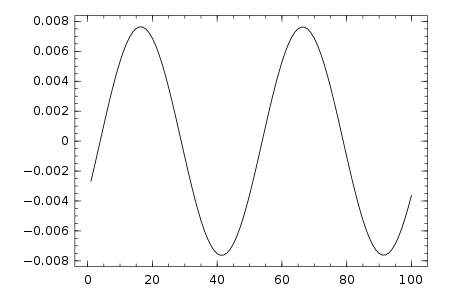

In [7]:
@manipulate for k=2:9
    plot(xmono[:,k][1:100])
end

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"k",5,2:9,"d",true)


(process:23559): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed

(process:23559): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


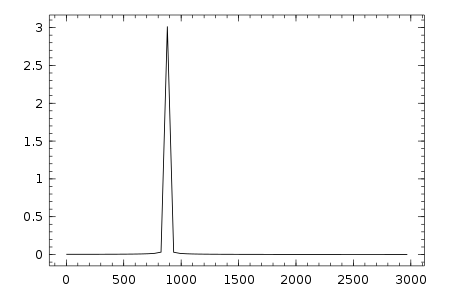

In [8]:
Fd=110
N=convert(Int32,ceil(Fs/Fd)) 
xx=collect(0:Fs/(2N):3000)
nn=length(xx)
@manipulate for k=2:9
    plot(xx,abs(fft(xmono[:,k][1:800]))[1:nn])
end

In [9]:
wavplay(xmono[:,1],Fs)

In [10]:
xx=sum(xmono,2)
wavplay(xx,Fs)